# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, "html.parser")

In [5]:
# Extract all rows of data
table = soup.find_all("tr", class_="data-row")
table

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_temp = []


# Loop through the scraped data to create a list of rows
for row in table:
    data = row.find_all("td")
    row_data=[td.text.strip() for td in data]
    mars_temp.append(row_data)


In [7]:
#checking to see if the data was scraped correctly
mars_temp

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

#gathering header names
    #could also just hard code the names bc there's only 7, but I wanted to try gathering them from the source

#difficulty grabbing just the headers straight from the code so scraped them within the table code
full_table = soup.find("table", class_="table")
headers = full_table.find_all("th")
header_list = []
for header in headers:
    col_name = header.text
    header_list.append(col_name)

header_list

#creating the df
mars_temp_df = pd.DataFrame(mars_temp, columns=header_list)

In [9]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_temp_df["terrestrial_date"] = pd.to_datetime(mars_temp_df["terrestrial_date"], format="%Y-%m-%d")
mars_temp_df[["id", "sol", "ls", "month"]] = mars_temp_df[["id", "sol", "ls", "month"]].astype("int64")
mars_temp_df[["min_temp", "pressure"]] = mars_temp_df[["min_temp", "pressure"]].astype("float")

In [12]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
    #there are 12 months on mars
len(mars_temp_df["month"].unique())


12

In [14]:
# 2. How many Martian days' worth of data are there?
    #there are 1867 days worth of data
len(mars_temp_df["sol"].unique())

1867

In [15]:
# 3. What is the average low temperature by month?
avg_temp = mars_temp_df.groupby("month")["min_temp"].mean()
avg_temp = pd.DataFrame(avg_temp)
avg_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0, 0.5, 'Temperature (C)')

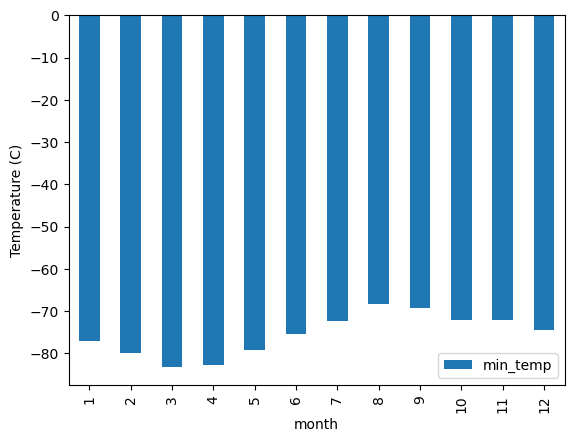

In [16]:
# Plot the average temperature by month
avg_temp.plot.bar().set_ylabel("Temperature (C)")

Text(0, 0.5, 'Temperature (C)')

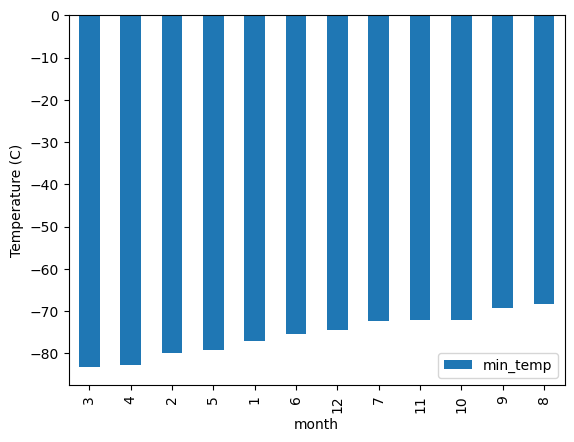

In [17]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp.sort_values("min_temp").plot.bar().set_ylabel("Temperature (C)")

In [18]:
# 4. Average pressure by Martian month
avg_pressure = mars_temp_df.groupby("month")["pressure"].mean()
avg_pressure = pd.DataFrame(avg_pressure)
avg_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0, 0.5, 'Atmospheric Pressure (Pa)')

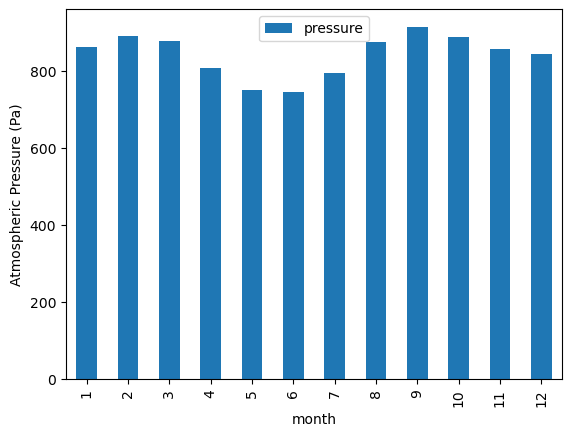

In [19]:
# Plot the average pressure by month
avg_pressure.plot.bar().set_ylabel("Atmospheric Pressure (Pa)")

Text(0, 0.5, 'Atmospheric Pressure (Pa)')

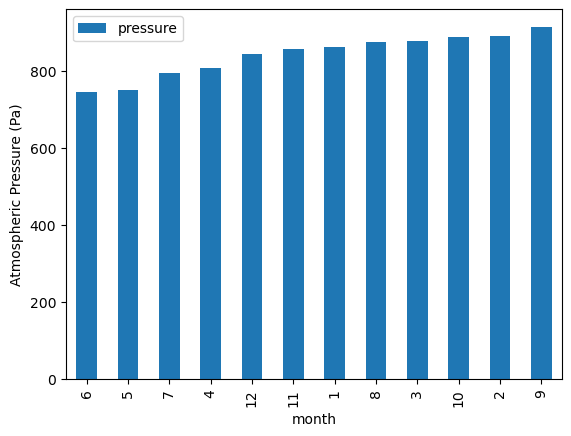

In [20]:
# sorted by lowest to highest pressure
avg_pressure.sort_values("pressure").plot.bar().set_ylabel("Atmospheric Pressure (Pa)")

In [32]:
#Mars completes one rotations around the sun when ls = 0
earth_days_df = mars_temp_df[mars_temp_df["ls"] == 0]
earth_days_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [34]:
# 5. How many terrestrial (earth) days are there in a Martian year?
start_date = earth_days_df["terrestrial_date"].iloc[0]
end_date = earth_days_df["terrestrial_date"].iloc[2]

martian_year = end_date - start_date
martian_year

Timedelta('687 days 00:00:00')

In [50]:
#finding the number of days by counting the no of earth days since the mission started
mission_start = mars_temp_df["terrestrial_date"].iloc[0]
mars_temp_df["terrestrial_days"] = mars_temp_df["terrestrial_date"] - mission_start

#have to convert days column to integer so we can plot it
mars_temp_df["terrestrial_days"] = mars_temp_df["terrestrial_days"].dt.days
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,terrestrial_days
0,2,2012-08-16,10,155,6,-75.0,739.0,0
1,13,2012-08-17,11,156,6,-76.0,740.0,1
2,24,2012-08-18,12,156,6,-76.0,741.0,2
3,35,2012-08-19,13,157,6,-74.0,732.0,3
4,46,2012-08-20,14,157,6,-74.0,740.0,4
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2017
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2018
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2019
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2020


Text(0.5, 0, 'Terrestrial Days Since Mission Start')

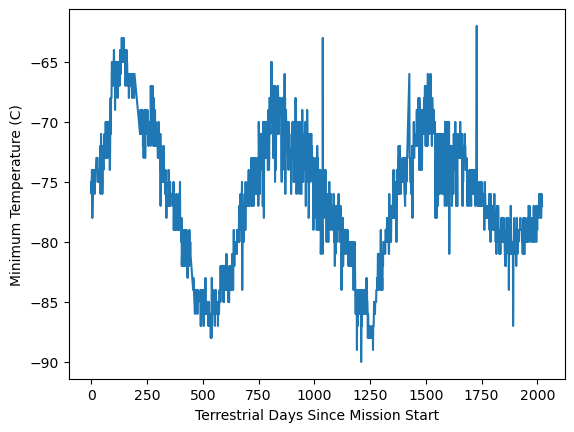

In [48]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(mars_temp_df["terrestrial_days"], mars_temp_df["min_temp"])
plt.ylabel("Minimum Temperature (C)")
plt.xlabel("Terrestrial Days Since Mission Start")

Text(0.5, 1.0, 'Temperature on Mars by Month')

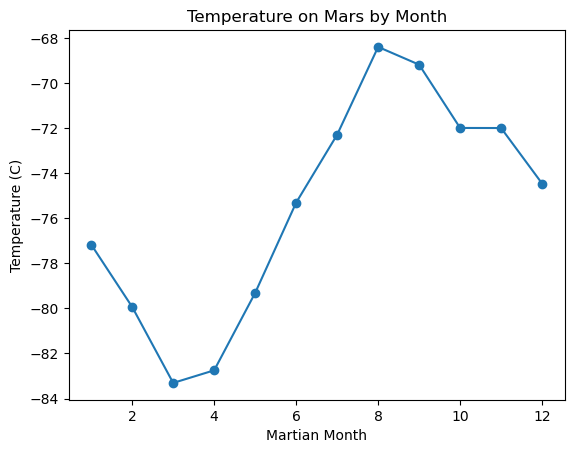

In [105]:
#for my own visualizations bc line plots help me better understand change through time
    #avg temp by month
plt.plot(avg_temp, marker ="o")
plt.ylabel("Temperature (C)")
plt.xlabel("Martian Month")
plt.title("Temperature on Mars by Month")

Text(0.5, 1.0, 'Atmospheric Pressure on Mars by Month')

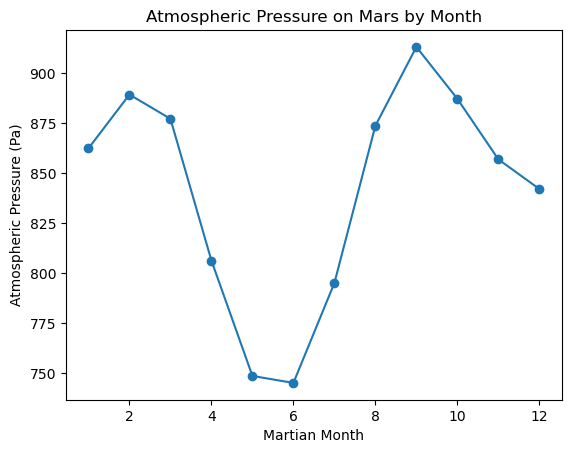

In [106]:
#atmospheric pressure by month
plt.plot(avg_pressure, marker ="o")
plt.ylabel("Atmospheric Pressure (Pa)")
plt.xlabel("Martian Month")
plt.title("Atmospheric Pressure on Mars by Month")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV


In [51]:
browser.quit()